In [8]:
import matplotlib.pyplot as plt
import json
import cv2
import numpy as np
import performance_utils as putils
import random

random.seed(123)
np.random.seed(123)

HOME_ROBOT_ROOT = "/home/srama/Research/StretchExperiments/home-robot"
# MAP_GT_PATH = f"{HOME_ROBOT_ROOT}/datadump/home_human_trial_1/snapshot_325.png"

# DATA_POINTS = [
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_ans_trial_1/snapshot_157.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_ans_t1_correspondences.json",
#         "match_dist": 2.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_ans_trial_2/snapshot_078.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_ans_t2_correspondences.json",
#         "match_dist": 2.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_ans_trial_3/snapshot_178.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_ans_t3_correspondences.json",
#         "match_dist": 1.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_depth_w_noise_mask_close_focal_trial_1/snapshot_139.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_depth_t1_correspondences.json",
#         "match_dist": 2.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_depth_w_noise_mask_close_focal_trial_2/snapshot_180.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_depth_t2_correspondences.json",
#         "match_dist": 1.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_depth_w_noise_mask_close_focal_trial_3/snapshot_199.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_depth_t3_correspondences.json",
#         "match_dist": 2.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_rgbd_w_noise_mask_close_focal_trial_1/snapshot_261.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_rgbd_t1_correspondences.json",
#         "match_dist": 2.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_rgbd_w_noise_mask_close_focal_trial_2/snapshot_157.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_rgbd_t2_correspondences.json",
#         "match_dist": 2.0,
#     },
#     {
#         "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_rgbd_w_noise_mask_close_focal_trial_3/snapshot_155.png",
#         "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_occant_rgbd_t3_correspondences.json",
#         "match_dist": 2.0,
#     },
# ]


MAP_GT_PATH = f"{HOME_ROBOT_ROOT}/datadump/home_v2_human_trial_1/snapshot_316.png"

DATA_POINTS = [
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_ans_trial_1/snapshot_181.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_ans_t1_correspondences.json",
        "match_dist": 2.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_ans_trial_2/snapshot_090.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_ans_t2_correspondences.json",
        "match_dist": 4.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_ans_trial_3/snapshot_144.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_ans_t3_correspondences.json",
        "match_dist": 2.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_depth_w_noise_mask_close_focal_trial_1/snapshot_181.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_depth_t1_correspondences.json",
        "match_dist": 2.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_depth_w_noise_mask_close_focal_trial_2/snapshot_131.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_depth_t2_correspondences.json",
        "match_dist": 1.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_depth_w_noise_mask_close_focal_trial_3/snapshot_126.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_depth_t3_correspondences.json",
        "match_dist": 4.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_rgbd_w_noise_mask_close_focal_trial_1/snapshot_242.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_rgbd_t1_correspondences.json",
        "match_dist": 2.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_rgbd_w_noise_mask_close_focal_trial_2/snapshot_167.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_rgbd_t2_correspondences.json",
        "match_dist": 2.0,
    },
    {
        "pred_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_rgbd_w_noise_mask_close_focal_trial_3/snapshot_233.png",
        "corr_path": f"{HOME_ROBOT_ROOT}/datadump/home_v2_occant_rgbd_t3_correspondences.json",
        "match_dist": 2.0,
    },
]

DATA_POINT = DATA_POINTS[8]

MAP_PRED_PATH = DATA_POINT["pred_path"]
CORRESPONDENCES_PATH = DATA_POINT["corr_path"]
MATCH_DISTANCE = DATA_POINT["match_dist"]

# Before estimating correspondences

Text(0.5, 1.0, 'Pred Map')

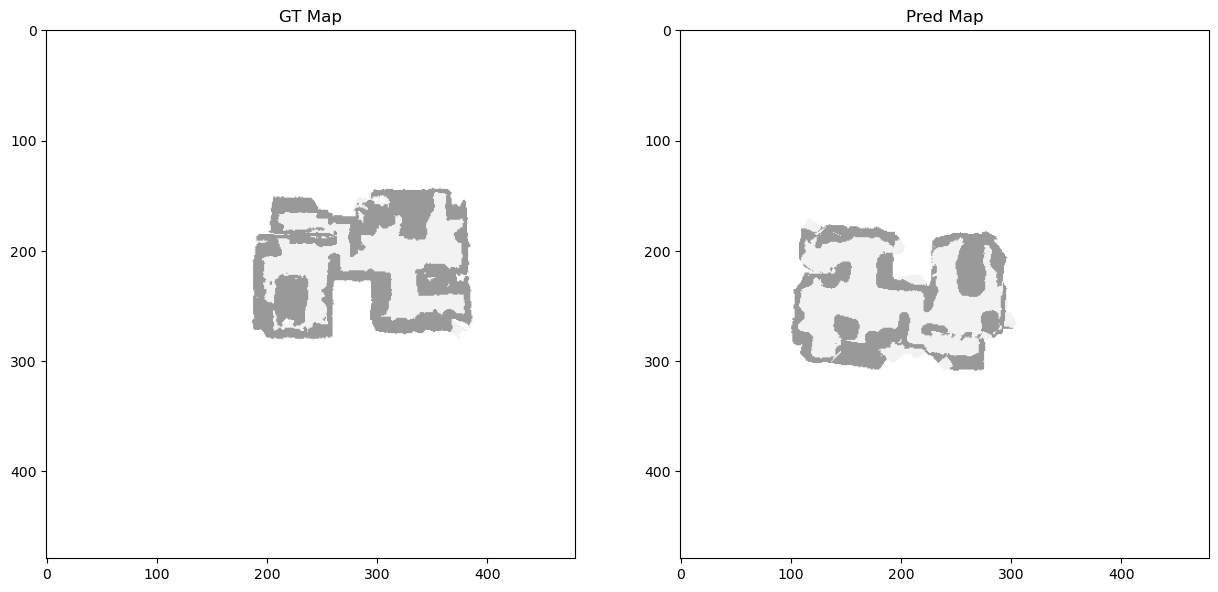

In [9]:
gt_map = putils.extract_clean_map(MAP_GT_PATH)
pred_map = putils.extract_clean_map(MAP_PRED_PATH)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axes[0].imshow(gt_map)
axes[0].set_title("GT Map")

axes[1].imshow(pred_map)
axes[1].set_title("Pred Map")

In [10]:
with open(CORRESPONDENCES_PATH, "r") as fp:
    correspondences = json.load(fp)

point_map = []
for (x1, y1), (x2, y2) in zip(correspondences["gt"], correspondences["pred"]):
    point_map.append((x1, y1, x2, y2))
H, _ = putils.RANSAC(point_map, match_distance=MATCH_DISTANCE)

print(H)

Running RANSAC with 24 points...
└──> iteration 1000/1000 	4 inliers 	best: 13[2KK
Num matches: 24
Num inliers: 13
Min inliers: 14.399999999999999
[[-1.04998535e+00  1.82250649e-01  4.76013719e+02]
 [-1.14101592e-01 -9.50676894e-01  4.96110000e+02]
 [ 2.94608482e-05  2.91782758e-04  1.00000000e+00]]


# After estimating correspondences

Text(0.5, 1.0, 'Pred Map')

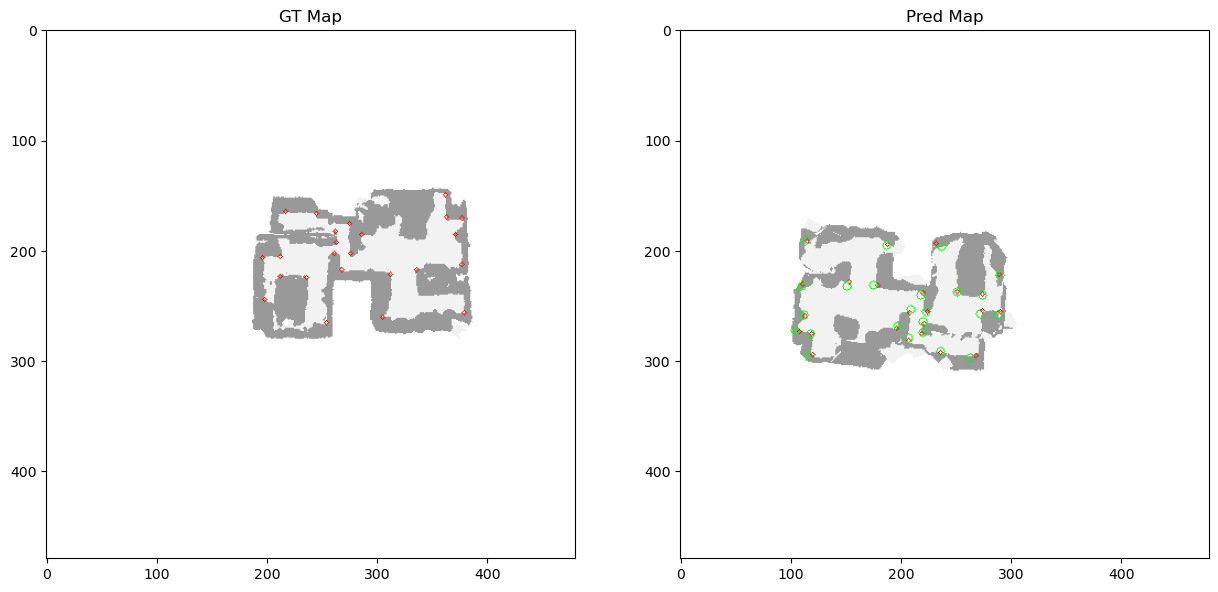

In [11]:
# Visualize homography
gt_map_vis = np.copy(gt_map)
pred_map_vis = np.copy(pred_map)

for (x1, y1), (x2, y2) in zip(correspondences["gt"], correspondences["pred"]):
    gt_map_vis = cv2.circle(gt_map_vis, (x1, y1), 2, (255, 0, 0))
    pred_map_vis = cv2.circle(pred_map_vis, (x2, y2), 2, (255, 0, 0))
    x1h, y1h = putils.transform(x1, y1, H)
    pred_map_vis = cv2.circle(pred_map_vis, (x1h, y1h), 4, (0, 255, 0))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axes[0].imshow(gt_map_vis)
axes[0].set_title("GT Map")

axes[1].imshow(pred_map_vis)
axes[1].set_title("Pred Map")

Text(0.5, 1.0, 'Pred Map')

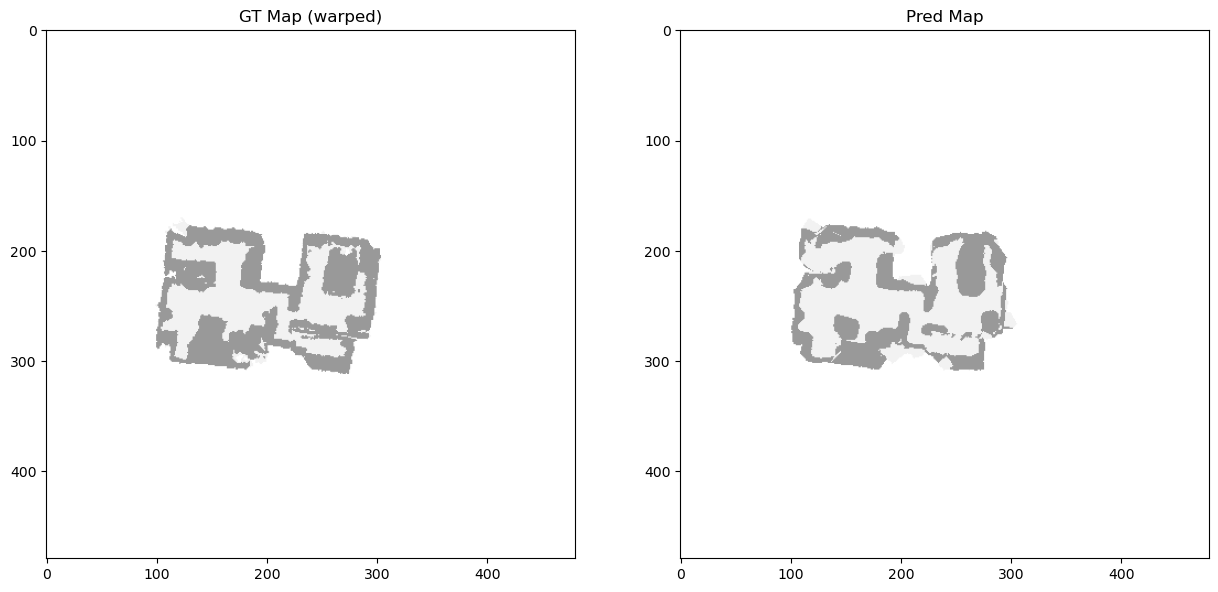

In [12]:
gt_map_warped = cv2.warpPerspective(gt_map, H, (gt_map.shape[1], gt_map.shape[0]), flags=cv2.INTER_NEAREST, borderValue=(255, 255, 255))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 15))
axes[0].imshow(gt_map_warped)
axes[0].set_title("GT Map (warped)")

axes[1].imshow(pred_map)
axes[1].set_title("Pred Map")


# Visualize with color coding

{(242, 242, 242), (255, 255, 255), (153, 153, 153)}
# obstacle cells:  11530
# explored cells:  20959
{(242, 242, 242), (255, 255, 255), (153, 153, 153)}
# obstacle cells:  8857
# explored cells:  21052


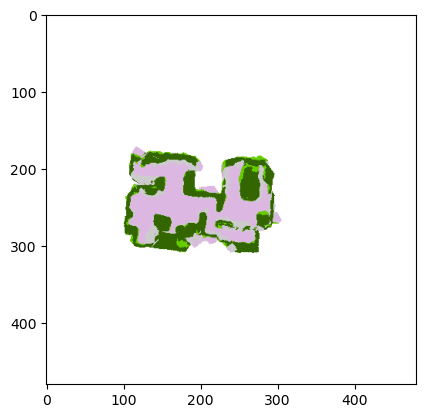

In [13]:
gt_map_warped_binary = putils.extract_binary_map(gt_map_warped)  # (2, H, W)
pred_map_binary = putils.extract_binary_map(pred_map)  # (2, H, W)

vis_map = putils.generate_topdown_allocentric_map(gt_map_warped_binary, pred_map_binary)

plt.imshow(vis_map)

In [14]:
from metrics import measure_map_quality
import torch


metrics = measure_map_quality(
    torch.from_numpy(pred_map_binary[np.newaxis, :, :, :]),
    torch.from_numpy(gt_map_warped_binary[np.newaxis, :, :, :]),
    map_scale=0.05,
    apply_mask=True,
    reduction="mean",
)
metrics_str = []
for k in ["mean_iou", "free_space_iou", "occ_space_iou", "map_accuracy"]:
    metrics_str.append("{:.3f}".format(metrics[k]))
print(",".join(metrics_str))

0.650,0.680,0.621,40.368
